In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [109]:
data_movies = pd.read_csv('/Users/Jerry/Documents/Pyspark_data/tmdb-movies.csv')

In [125]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [147]:
data_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [126]:
# Obtaining a list of genres
genre_details = list(map(str, data_movies['genres']))
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
        
print(genre)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'nan', 'Foreign']


In [127]:
# minimum range value
min_year = data_movies['release_year'].min()
# maximum range value
max_year = data_movies['release_year'].max()
print(min_year, max_year)

1960 2015


In [143]:
# Creating a dataframe with genre as index and years as columns
genre_df = pd.DataFrame(index = genre
                        , columns = range(min_year, max_year +1))
# to fill not assigned values to zero
genre_df = genre_df.fillna(value = 0)
print(genre_df.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              0     0     0     0     0     0     0     0     0     0   
Adventure           0     0     0     0     0     0     0     0     0     0   
Science Fiction     0     0     0     0     0     0     0     0     0     0   
Thriller            0     0     0     0     0     0     0     0     0     0   
Fantasy             0     0     0     0     0     0     0     0     0     0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...      0     0     0     0     0     0     0     0     0   
Adventure        ...      0     0     0     0     0     0     0     0     0   
Science Fiction  ...      0     0     0     0     0     0     0     0     0   
Thriller         ...      0     0     0     0     0     0     0     0     0   
Fantasy          ...      0     0     0     0     0     0     0     0     0   

                 2015  
Action              0  
Ad

In [144]:
# list of years of each movie
year = np.array(data_movies['release_year'])

In [146]:
z = 0
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        genre_df.loc[j, year[z]] = genre_df.loc[j, year[z]] +1

    z += 1
genre_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,10,11,9,9,9,15,17,13,12,12,...,124,130,142,169,148,156,156,165,173,168
Adventure,6,7,8,10,8,10,12,8,7,7,...,92,77,106,103,76,89,89,88,83,122
Science Fiction,5,4,2,2,4,8,6,4,6,4,...,48,57,88,98,65,81,68,95,109,120
Thriller,10,2,8,15,13,13,19,7,14,9,...,151,175,178,230,202,215,228,238,268,247
Fantasy,4,5,2,2,4,3,2,3,5,4,...,55,61,70,67,52,64,62,65,48,54
Crime,4,4,5,7,15,2,13,8,8,4,...,70,86,75,80,72,79,84,104,84,83
Western,6,4,3,2,1,4,7,5,1,7,...,2,5,3,3,8,3,7,6,6,12
Drama,16,23,31,18,26,23,26,24,26,19,...,257,287,308,330,311,318,334,379,417,377
Family,6,7,4,7,8,4,7,4,7,5,...,89,56,85,78,70,93,78,76,62,67
Animation,0,1,1,1,3,3,3,2,3,4,...,49,40,51,66,57,68,61,56,52,60


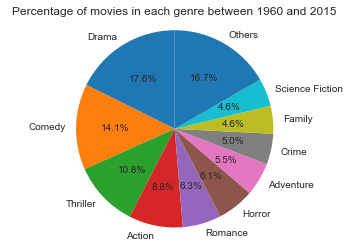

In [174]:
# number of movies in each genre so far.
genre_count = {}
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('|')))
    for j in split_genre:
        if j in genre:
            genre_count[j] = genre_count[j] + 1
        else:
            genre.append(j)
            genre_count[j] = 1
gen_series = pd.Series(genre_count)

# pi chart
gen_series = gen_series.sort_values(ascending = False)
label = list(map(str,gen_series[0:10].keys())) #keys 回傳 dic裡的items物件
                                            # label 回傳gen_series前十高的電影類型
label.append('Others')
gen = gen_series[0:10]
sum = 0
for i in gen_series[10:]: #sum gen_series 第十個到最後，作為Others
    sum += i
gen['sum'] = sum
fig1, ax1 = plt.subplots()
ax1.pie(gen, labels = label, autopct = '%1.1f%%', startangle = 90)
# gen = 每塊比例, labels = 文字說明, autopct = '%1.1f%%'小數點前後幾位數
# startangle = 起始繪製角度
ax1.axis('equal')
plt.title('Percentage of movies in each genre between 1960 and 2015')
plt.show()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
sum                4500
dtype: int64